# Nomination Tutorial

In this tutorial we will explore the vertex nominiation class by nominating verticies in two ER graph models.

In [1]:
from graspologic.nominate import VNviaSGM
from graspologic.simulations import er_np
from graspologic.plot import heatmap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define parameters
n = 50
p = 0.3
num_seeds = 4

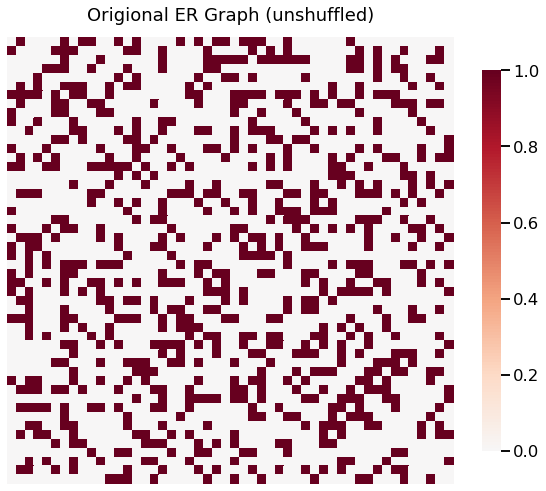

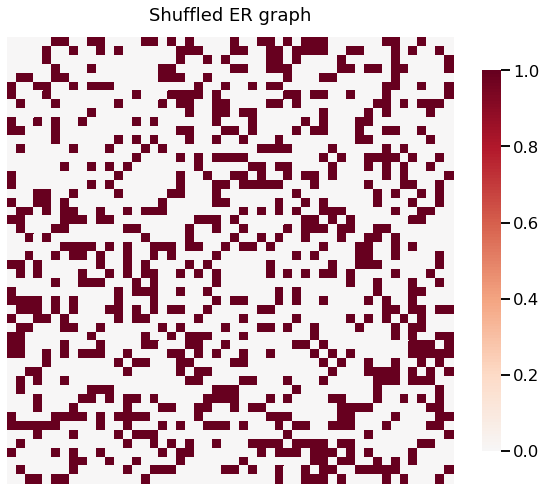

In [3]:
np.random.seed(2)
G1 = er_np(n=n, p=p)
node_shuffle_input = np.random.permutation(n)

G2 = G1[np.ix_(node_shuffle_input, node_shuffle_input)]

heatmap(G1, title = "Origional ER Graph (unshuffled)")
heatmap(G2, title = "Shuffled ER graph")

In [4]:
kklst= [(xx, yy) for xx, yy in zip(node_shuffle_input, np.arange(len(node_shuffle_input)))]
kklst.sort(key=lambda x:x[0])
print("Association from (node G1, node G2): ", kklst)
kklst = np.array(kklst)

kklst_dict = {}
for kk in kklst:
    kklst_dict[kk[0]]=kk[1]

Association from (node G1, node G2):  [(0, 24), (1, 13), (2, 1), (3, 47), (4, 11), (5, 37), (6, 43), (7, 42), (8, 2), (9, 8), (10, 29), (11, 22), (12, 16), (13, 41), (14, 40), (15, 44), (16, 15), (17, 35), (18, 9), (19, 18), (20, 36), (21, 5), (22, 45), (23, 34), (24, 39), (25, 30), (26, 10), (27, 23), (28, 32), (29, 25), (30, 33), (31, 48), (32, 4), (33, 20), (34, 0), (35, 6), (36, 3), (37, 31), (38, 7), (39, 19), (40, 46), (41, 26), (42, 17), (43, 38), (44, 14), (45, 49), (46, 27), (47, 12), (48, 21), (49, 28)]


In [5]:
voi = 5 # choose a vertex of interest

VNalg = VNviaSGM()
print(VNalg.fit_predict(voi, G1, G2, kklst[0:num_seeds, 0], kklst[0:num_seeds, 1]))

[(37, 0.91), (43, 0.04), (42, 0.02), (7, 0.01), (35, 0.01), (40, 0.01), (24, 0.0), (8, 0.0), (11, 0.0), (14, 0.0), (19, 0.0), (21, 0.0), (23, 0.0), (25, 0.0), (26, 0.0), (34, 0.0), (38, 0.0), (41, 0.0), (45, 0.0), (48, 0.0)]


The algorithm produces a nomination list in the following format (index j in G2, probability that j matches voi). Note: the output is sorted with the largest probability coming first in the output lsit. As seen, the actual correspondence is 5--37 and the model predicts that 5 matches with 37 with 97% confidence. 

#### Treat verts num_seeds --> G1.shape[0] as vois and examine thier predictions

In [6]:
probs = []
is_max = []
vois = []

VNalg2 = VNviaSGM()
for voi in range(num_seeds, G1.shape[0]):
    nom_lst = VNalg2.fit_predict(voi, G1, G2, kklst[0:num_seeds:, 0], kklst[0:num_seeds:, 1])
    if nom_lst is not None:
        expected_g2_vert = kklst_dict[voi]

        if nom_lst[0][0] == expected_g2_vert:
            is_max.append(True)
        else:
            is_max.append(False)
            print(nom_lst, expected_g2_vert)
        
        pred = [nom for nom in nom_lst if nom[0]==expected_g2_vert]

        if len(pred) > 0:
            probs.append(pred[0][1])
        else:
            probs.append(0.0)

        vois.append(voi)

Fraction of vois where correct vertex in G2 had max prob = 32/32


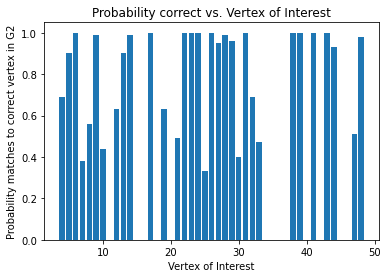

In [7]:
plt.figure()
plt.bar(vois, probs)
plt.xlabel("Vertex of Interest")
plt.ylabel("Probability matches to correct vertex in G2")
plt.title("Probability correct vs. Vertex of Interest")

print("Fraction of vois where correct vertex in G2 had max prob = {}/{}".format(len([im for im in is_max if im]), len(is_max)))

As seen above, all nominations lists produced by the algorithm have the correct VOI as the largest probability. Note, some vois must be skipped becuase they were not in the induced subgraph generated by the seeds. If this is the case the model returns None. 